In [1]:
import fedoo as fd
import numpy as np
import pyvista as pv

c:\Users\okouo\miniconda3\envs\Fedoo_DSTI\Lib\site-packages\fedoo\core\base.py:48: UserWarning: WARNING: no fast direct sparse solver has been found. Consider installing pypardiso, petsc, or scikit-umfpack to improve computation performance
  warnings.warn(


# Geometry and Mesh

 In this example, a mesh is created with an I-shaped cross-section.
 First, an I-shape profil is built using linear triangle elements 'tri3'.
The 'extrude' function is then used to create
the 3d geometry based on wedge elements 'wed6'.

element type: 'wed15'


c:\Users\okouo\miniconda3\envs\Fedoo_DSTI\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


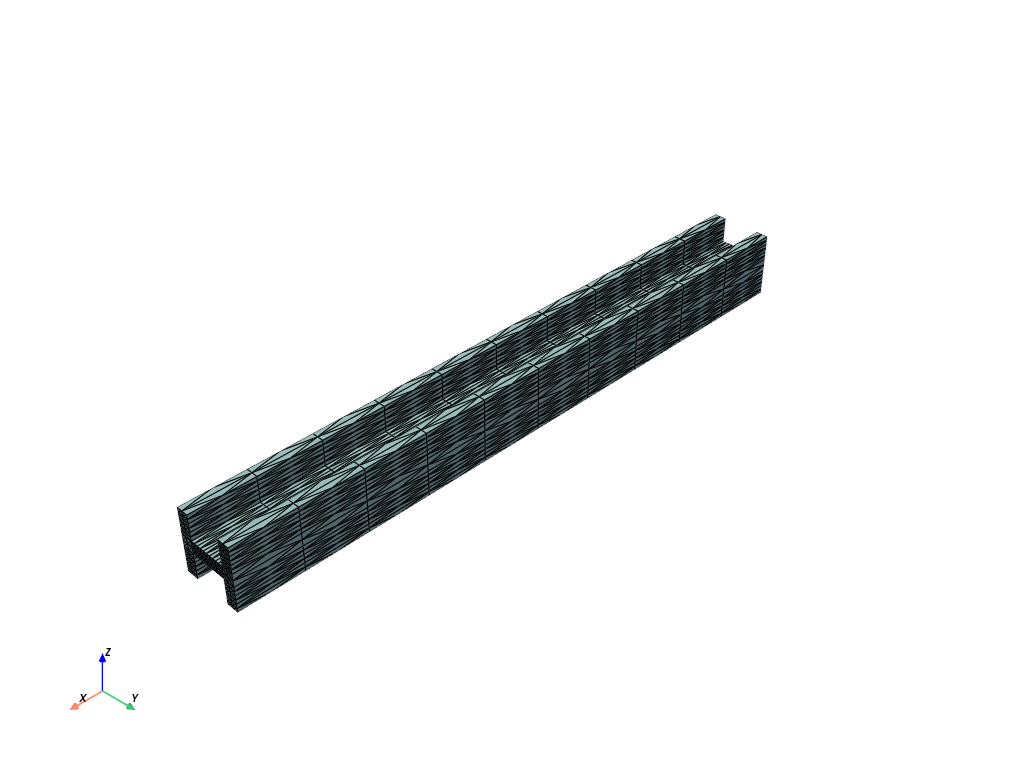

In [3]:
# Build a I shaped beam profil
profil = fd.mesh.structured_mesh.I_shape_mesh(10, 10, 2, 2, 1, "tri3")
mesh = fd.mesh.extrude(
    profil,
    100,  # extrusion length,
    11,
)  # n_nodes
mesh.nodes = mesh.nodes[
    :, [2, 1, 0]
]  # switch axis to put the extrusion direction along the X axis

mesh = fd.mesh.functions.change_elm_type(mesh, 'wed15') 

print(f"element type: '{mesh.elm_type}'")
mesh.plot()

# Problem definition
Define a 3d linear static problem with a linear elastc constitutive law


In [4]:
fd.ModelingSpace("3D")

In [5]:
# Material definition
material = fd.constitutivelaw.ElasticIsotrop(200e3, 0.3)
wf = fd.weakform.StressEquilibrium(material)

# Assembly
assembly = fd.Assembly.create(wf, mesh)

# Type of problem
pb = fd.problem.Linear(assembly)


# Boundary conditions

Create set of nodes to apply boundary conditions
(ie numpy array of node indices) and apply boundary conditions on the sets:
   - Ux = Uy = 0 on the left bottom edge
   - Uy = 0 on the right bottom edge
   - Uy = -10 on the edge at the center top


In [6]:
bottom = mesh.find_nodes("Y", mesh.bounding_box.ymin)
top = mesh.find_nodes("Y", mesh.bounding_box.ymax)

left_bottom = np.intersect1d(mesh.find_nodes("X", mesh.bounding_box.xmin), bottom)
right_bottom = np.intersect1d(mesh.find_nodes("X", mesh.bounding_box.xmax), bottom)
center_top = np.intersect1d(mesh.find_nodes("X", mesh.bounding_box.center[0]), top)

pb.bc.add("Dirichlet", left_bottom, "Disp", 0)
pb.bc.add("Dirichlet", right_bottom, "DispY", 0)
pb.bc.add("Dirichlet", center_top, "DispY", -10)


Dirichlet boundary condition:
var = 'DispY'
n_nodes = 15
value = -10

# Solve and plot results

Solve and extract, stress and displacement field and plot \sigma_{xx}

c:\Users\okouo\miniconda3\envs\Fedoo_DSTI\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


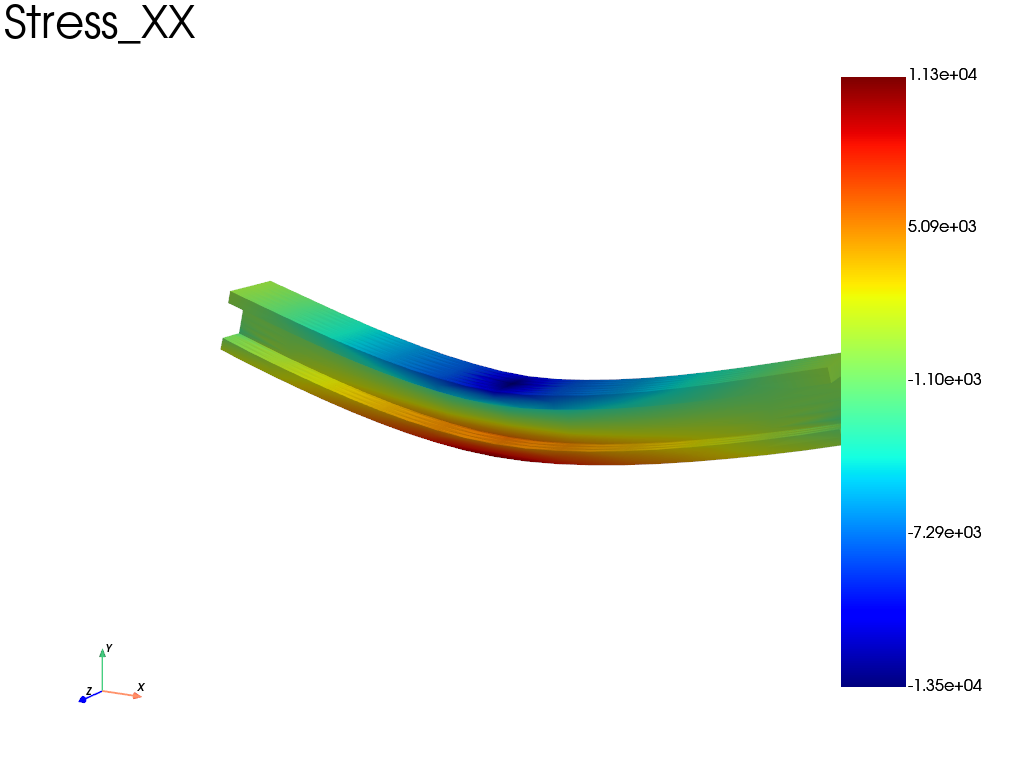

c:\Users\okouo\miniconda3\envs\Fedoo_DSTI\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


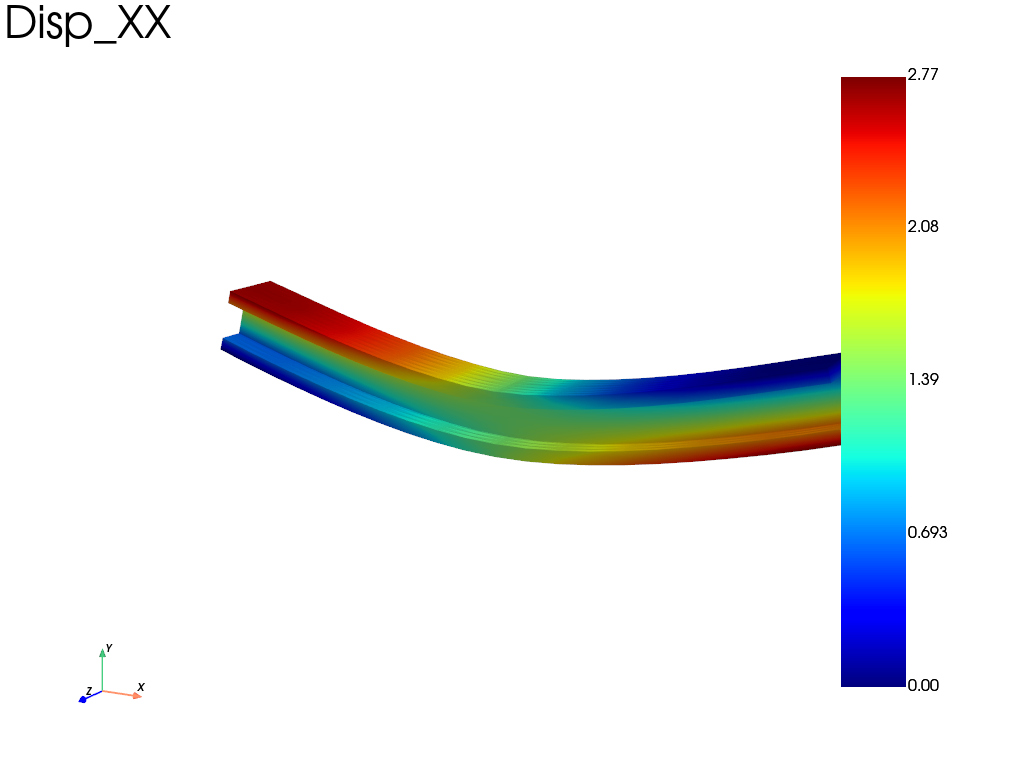

In [8]:
pb.solve()

res = pb.get_results(assembly, ["Stress", "Disp"])
res.plot("Stress", "XX", "Node", show_edges=False)
res.plot("Disp", "XX", "Node", show_edges=False)